In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
from statsmodels.stats.anova import anova_lm
from matplotlib.pyplot import subplots

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [5]:
dir()

['In',
 'MS',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_pydevd_bundle',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'plt',
 'poly',
 'pydev_jupyter_vars',
 'quit',
 'remove_imported_pydev_package',
 'sm',
 'subplots',
 'summarize',
 'sys']

In [6]:
A = np.array([3, 5, 11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [7]:
A.sum?

In [8]:
A.sum()

np.int64(19)

In [9]:
Boston = load_data("Boston")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


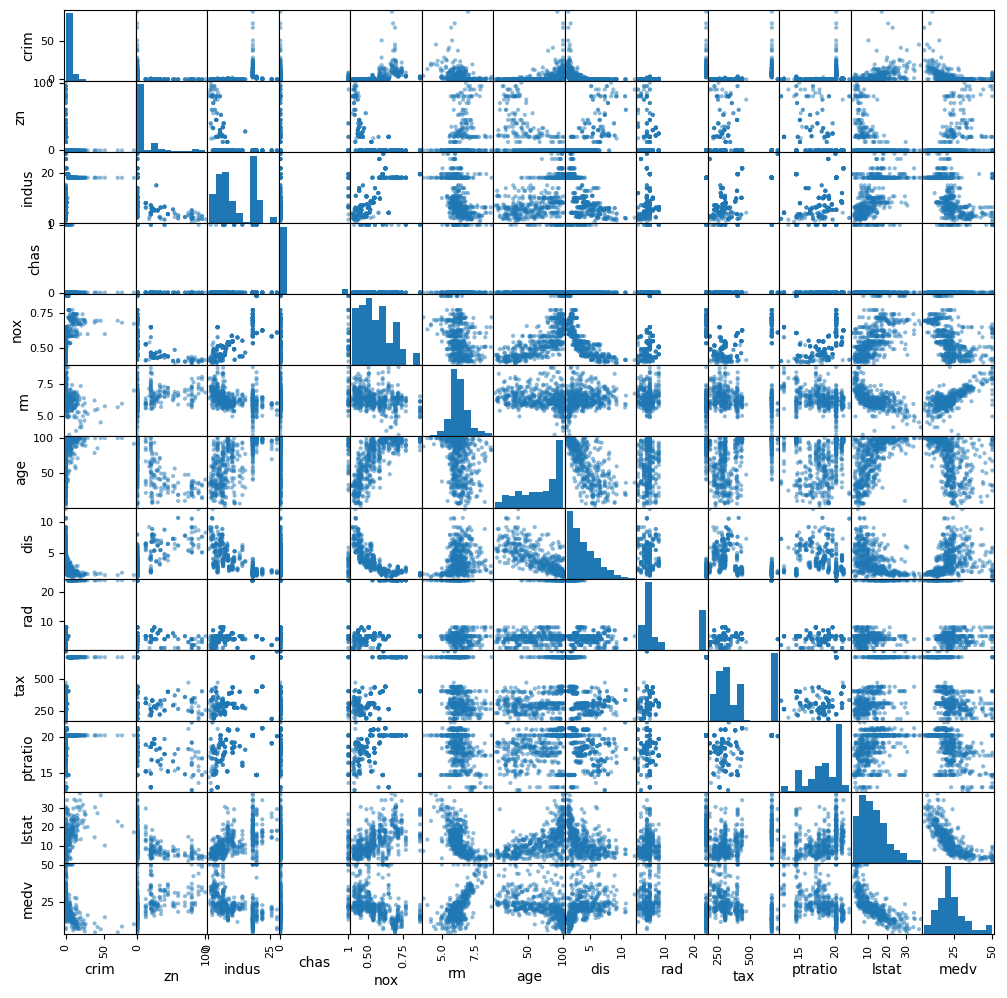

In [11]:
pd.plotting.scatter_matrix(Boston, figsize = (12, 12));

# It looks like rm and lstat have the highest correlation with medv from the plots we generated.

In [12]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                 'lstat': Boston['lstat']})
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [13]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [14]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 01 May 2025   Prob (F-statistic):           5.08e-88
Time:                        16:10:41   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Calculate RSE
print("RSE = ", np.sqrt(results.scale))

RSE =  6.215760405398068


# Y = 34.5538 - 0.95X

# Yes the predictor, lstat, is signifigant to the model.  Our null hypothesis would be that lstat doesnt affect the model and our alternative hypothesis would be lstat does affect the model.  Since our p-value is basically 0 and our t statistic is roughly -24 we can reject our null hypothesis and conclude that lstat is signifgant to the model.

# This model fits the data okay, certainly not great but also not terrible.  Our RSE lets us know that on average we are off by about 6.215 thousand dollars for our guesses.  Our R squared value of roughly 0.544 lets us know that there is probably some correlation with our data but it might not be the strongest.

In [17]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [18]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [19]:
results.conf_int()

,0,1
intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


# The above confidence interval means that we are 95% confident the true value for the slope is somewhere between -1.026 and -0.874

In [20]:
# Model Matrix
new_df = pd.DataFrame({'lstat' : [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [21]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [22]:
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [23]:
new_predictions.conf_int(obs = True, alpha = 0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

# The difference between a prediction interval and a confidence interval is that a prediction interval is the average for a specific case and confidence interval is the average for the whole model.

In [24]:
new_df = pd.DataFrame({'lstat' : [15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,15


In [25]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([20.30310057])

In [26]:
new_predictions.conf_int(alpha = 0.05)

array([[19.73158815, 20.87461299]])

In [27]:
new_predictions.conf_int(obs = True, alpha = 0.05)

array([[ 8.0777421 , 32.52845905]])

# Confidence Interval = [19.732, 20.874]
# Prediction Interval = [8.078, 32.528]

# We can be 95% confident for the whole model that the lower 15% of the populations home values will fall somewhere in the confidence interval above(in thousands) and for each specific home value we can be 95% confident that the value (in thousands) will be within our prediction interval above

In [28]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

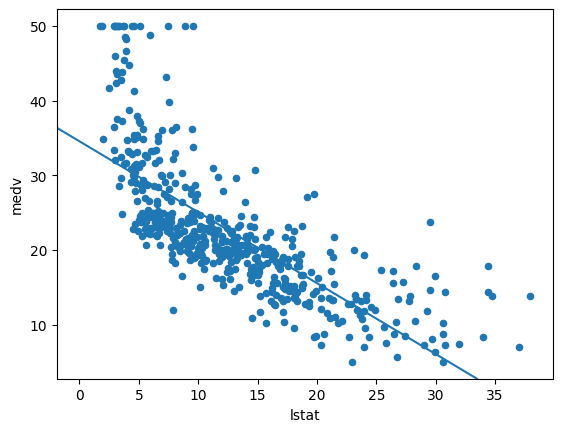

In [29]:
ax = Boston.plot.scatter('lstat', 'medv');
ax.axline(xy1 = (0, 34.55), slope = -0.95);

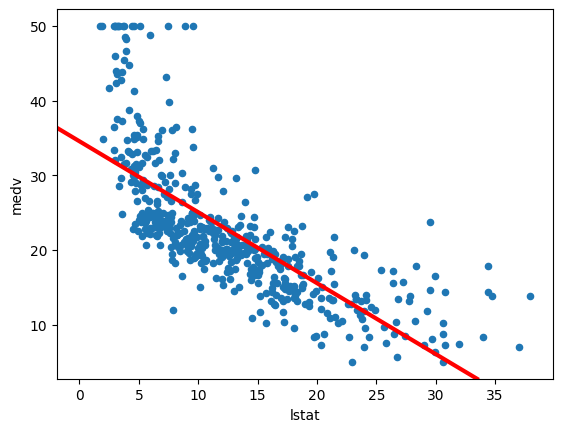

In [30]:
ax = Boston.plot.scatter('lstat', 'medv');
ax.axline(xy1 = (0,34.55), slope = -0.95, color = "red", linewidth = 3);

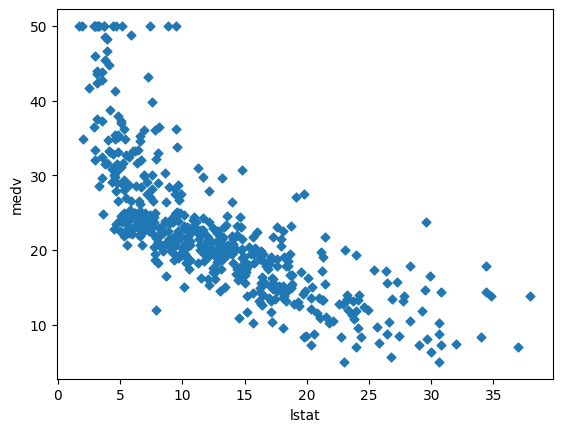

In [31]:
Boston.plot.scatter('lstat', 'medv', marker = 'D');

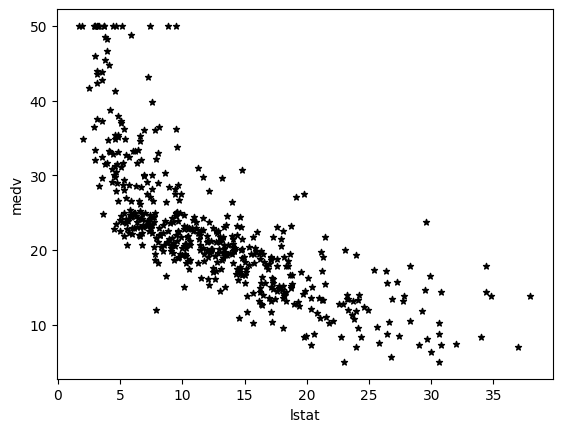

In [32]:
Boston.plot.scatter('lstat', 'medv', marker = "*", color = "black");

In [33]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model = sm.OLS(y, X)
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [34]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.98e-88
Time:                        16:10:46   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [36]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [37]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 01 May 2025   Prob (F-statistic):          2.23e-133
Time:                        16:10:46   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Yes this model is signifigant, we will prove this with a hypothesis test.

# Our null hypothesis will be that the model is not signifigant
# Our alternate hypothesis will be that th emodel is signifigant

# Since our T-statistic is 113.5 and our p-value is 2.23 e^-133 we can conclude that the model is signifigant

# No, this does not mean that all the predictors are needed for the model, we could probably do without the age predictor and the industry predictor because the p-values are high for these predictors

# No they do not differ, in both situations we use the p-value and t statistic to either reject or accept our nully hypothesis

# Our coefficient for chas would indicate that all other variables being constant if the tract bounds the Charles River we would estimate medv to be 2.8400 times more.

In [38]:
X = MS(['lstat', 'chas', ('lstat', 'chas')]).fit_transform(Boston)
model = sm.OLS(y, X)
results3 = model.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,33.7672,0.570,59.222,0.000
lstat,-0.9150,0.039,-23.478,0.000
chas,9.8251,2.103,4.672,0.000
lstat:chas,-0.4329,0.160,-2.703,0.007


# Yes the interaction term is statistically signifigant because the p-value is lower than 0.05 however it is higher than the the two variables by themselves so it might not be better neccesarily

# For lstat and chas to interact it would mean that if chas had a different value it could potentially affect our prediction for medv for the same value of lstat

In [39]:
design = MS([poly('lstat', degree = 2, raw = True)])
X = design.fit_transform(Boston)
model = sm.OLS(y, X)
results4 = model.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,42.8620,0.872,49.149,0.0
"poly(lstat, degree=2, raw=True)[0]",-2.3328,0.124,-18.843,0.0
"poly(lstat, degree=2, raw=True)[1]",0.0435,0.004,11.628,0.0


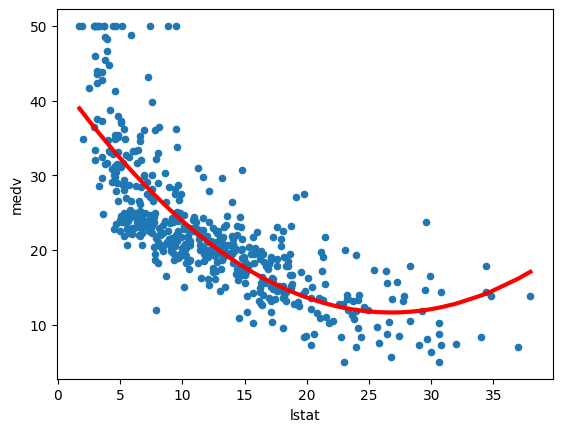

In [40]:
ypred = results4.get_prediction(X)
arr = np.array(Boston.lstat)
index = np.argsort(arr)
ax = Boston.plot.scatter('lstat', 'medv');
ax.plot(arr[index], ypred.predicted_mean[index], linewidth = 3, color = "red")

In [41]:
anova_lm(results, results4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [42]:
data = pd.DataFrame({'lstat':Boston.lstat, 'log_lstat': np.log(Boston.lstat)})
data

,lstat,log_lstat
0,4.98,1.605430
1,9.14,2.212660
2,4.03,1.393766
3,2.94,1.078410
4,5.33,1.673351
...,...,...
501,9.67,2.269028
502,9.08,2.206074
503,5.64,1.729884
504,6.48,1.868721


In [43]:
X = MS(['log_lstat']).fit_transform(data)
model = sm.OLS(y, X)
results5 = model.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,52.1248,0.965,54.004,0.0
log_lstat,-12.4810,0.395,-31.627,0.0


In [44]:
ypred2 = results5.get_prediction(X)
ypred2.predicted_mean

array([32.08743078, 24.50860389, 34.72919722, 38.66515659, 31.23970634,
       31.52391533, 20.67129755, 15.27714857,  9.70366304, 16.6902973 ,
       14.45739623, 19.85513005, 17.74844674, 25.77212507, 23.06589769,
       25.45877877, 28.61017136, 18.60330422, 21.43736876, 21.88297104,
       14.1142758 , 19.33923784, 15.5605945 , 14.81021686, 17.28830256,
       17.12853176, 18.4847595 , 16.5596053 , 20.30520236, 21.13152482,
       13.20971059, 20.07335101, 10.66554614, 15.80975085, 14.52471225,
       23.79217717, 21.73995261, 25.02436233, 23.22504907, 33.86190662,
       43.59904385, 32.44332783, 30.16348044, 27.07705737, 23.96092924,
       23.12686983, 19.05374211, 15.50737065,  9.34198954, 17.36510879,
       19.6869707 , 24.11875185, 31.35734126, 25.5178604 , 18.49318974,
       32.52092998, 30.24970512, 34.97945066, 28.09005559, 24.39983656,
       19.96850832, 18.80053427, 28.32884527, 24.0264463 , 26.09354125,
       32.88959309, 23.09025081, 26.01625945, 20.02558604, 24.99

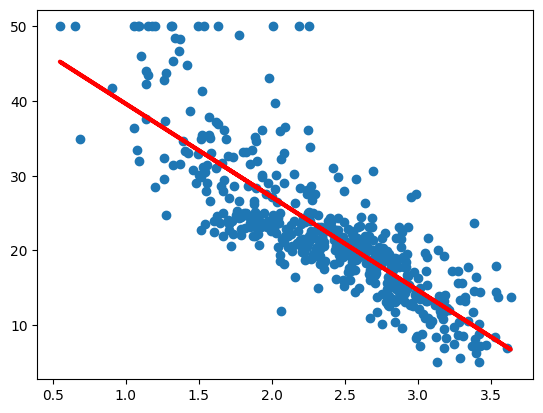

In [45]:
y = Boston['medv']
arr2 = np.array(Boston.lstat)
arr2 = np.log(arr2)
index2 = np.argsort(arr2)
plt.scatter(arr2, y);
plt.plot(arr2, ypred2.predicted_mean, color = "red", linewidth = 3);